In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.ndimage import filters

from opm import make_opm, plot_opm, plot_amplitude_map
from pinwheels import plot_pinwheels
from response import response, create_stimuli, compute_responses
from kernels import mexican_hat_kernel

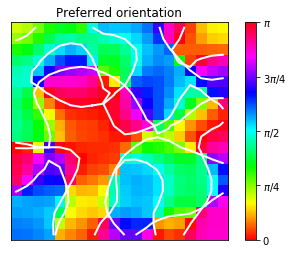

In [5]:
size = 20

# ground truth opm
m = make_opm(size=size, sigma=2., k=2.)

f, ax = plot_opm(m)
plot_pinwheels(m, ax)

plt.show()

X, Y = np.meshgrid(np.arange(size), np.arange(size))
indices = np.vstack((X.flatten(), Y.flatten())).T

In [6]:
# compute responses
contrasts = [0.25, 0.5, 1.0]
orientations = [i * np.pi / 8 - np.pi/2 for i in range(8)]
repetitions = 8

S = create_stimuli(contrasts, orientations, repetitions)
R = compute_responses(m, contrasts, orientations, repetitions)

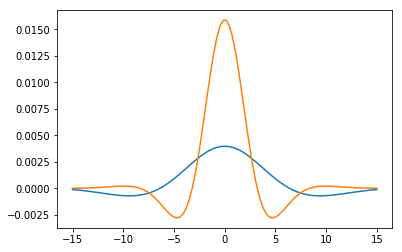

In [7]:
xx = np.linspace(-15, 15, 100)[:,np.newaxis]
plt.plot(xx, mexican_hat_kernel(0, xx, sigma=3., k=2.))
plt.plot(xx, mexican_hat_kernel(0, xx, sigma=3., k=0.5))
plt.show()

In [8]:
def K_prior(idx, kernel, **kwargs):
    """ Compute the prior covariance matrix for an OPM, given a kernel function
    Args:
        idx: The indices at which to compute the covariance (npixels x 2 matrix, where the kth column contains the x and y coordinates of the kth pixel)
        kernel: a kernel function that takes two vectors x and y
        kwargs: parameters for the kernel function
    """
    
    K = np.zeros((idx.shape[0], idx.shape[0]))
    for i in range(idx.shape[0]):
        for j in range(idx.shape[0]):
            K[i, j] = kernel(idx[[i]], idx[[j]], **kwargs)
            
    return K

In [9]:
K = K_prior(indices, kernel=mexican_hat_kernel, sigma=6.)

K_m = np.kron(np.eye(2), K)

(400, 400)